In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Data 

In [2]:
data=pd.read_csv(r"E:\Technocolab Softwares Internship\9961_14084_bundle_archive\Train.csv")
data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


- Item_Visibility : The % of total display area of all products in a store allocated to the particular product
- Item_MRP : Max Retail Price ( list price ) of the product 
- Item_Outlet_Sales : Sales of the product in the particular store. This is the outcome variable to be predicted.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
data.shape

(8523, 12)

## Then we have 12 features and 8523 training exmaples

In [5]:
# Statistical info 
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
# Check for null values 
data.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
weight_median = data['Item_Weight'].median()

In [8]:
weight_median

12.6

In [9]:
weight_mean = data['Item_Weight'].mean()

In [10]:
weight_mean

12.857645184135976

In [11]:
# Handling Duplicates 
data.duplicated().sum()

0

In [12]:
# Handling Outliers 

<function matplotlib.pyplot.show(close=None, block=None)>

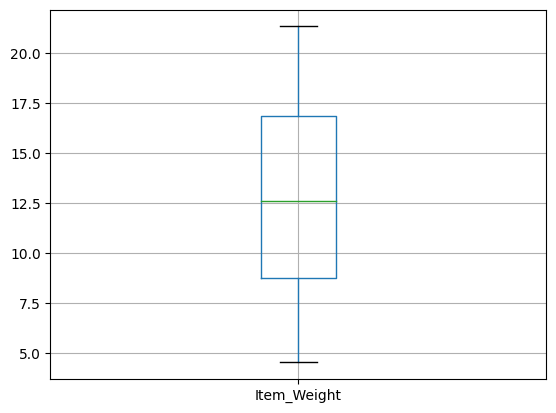

In [13]:
data.boxplot( column = ['Item_Weight'])
plt.show

In [14]:
# Replacing null values with the median ( numerical columns )
data['Item_Weight'].replace( np.nan , weight_median , inplace = True )

In [15]:
data.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [16]:
size_mode = data['Outlet_Size'].mode().values[0]

In [17]:
size_mode

'Medium'

In [18]:
# Replacing null values with the mode ( categorical columns )
data['Outlet_Size'].replace( np.nan , size_mode , inplace = True )

In [19]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [23]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8.523000e+03,8523.000000,8523.000000,8523.000000,8523.000000
mean,2.192570e-16,0.066132,140.992782,1997.831867,2181.288914
std,1.000059e+00,0.051598,62.275067,8.371760,1706.499616
min,-1.953734e+00,0.000000,31.290000,1985.000000,33.290000
25%,-8.288209e-01,0.026989,93.826500,1987.000000,834.247400
50%,-5.048970e-02,0.053931,143.012800,1999.000000,1794.331000
75%,7.538647e-01,0.094585,185.643700,2004.000000,3101.296400
max,2.019540e+00,0.328391,266.888400,2009.000000,13086.964800


In [20]:
# Scaling data
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler

StandardScaler()

In [24]:
data['Item_Weight'] = std_scaler.fit_transform( data[['Item_Weight']])
data['Item_Visibility'] = std_scaler.fit_transform( data[['Item_Visibility']])
data['Item_MRP'] = std_scaler.fit_transform( data[['Item_MRP']])
data['Item_Outlet_Sales'] = std_scaler.fit_transform( data[['Item_Outlet_Sales']])
data['Item_Outlet_Sales'] = std_scaler.fit_transform( data[['Item_Outlet_Sales']])

In [ ]:
# Encoding

In [31]:
# Check for categorical columns 
categorical_col = []
for i in data.dtypes.index :
    if data.dtypes[i] == 'object' :
        categorical_col.append(i)
categorical_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [32]:
# Removing unnecessary columns 
categorical_col.remove('Item_Identifier')
categorical_col.remove('Outlet_Identifier')
categorical_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [33]:
# Print the categorical columns
for col in categorical_col:
    print(col)
    print(data[col].value_counts())
    print()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

In [34]:
# We can notice that low fat is repeated three times in Item_Fat_Content 

In [38]:
# Combining the repeated values in 'Item_Fat_Content' column
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [39]:
categorical_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoders = {}
for col in categorical_col:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])  

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int32  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int32  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int32  
 9   Outlet_Location_Type       8523 non-null   int32  
 10  Outlet_Type                8523 non-null   int32  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(5), int64(1), object(2)
memory usage: 632.7+ KB


In [43]:
# Removing unnecessary columns 
data.drop('Item_Identifier',axis=1,inplace=True)
data.drop('Outlet_Identifier',axis=1,inplace=True)

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   int32  
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   int32  
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   int32  
 7   Outlet_Location_Type       8523 non-null   int32  
 8   Outlet_Type                8523 non-null   int32  
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int32(5), int64(1)
memory usage: 499.5 KB


Check unique values in data
data.apply(lambda x: len(x.unique())) 

In [46]:
# Splitting data
y = data.loc[ : , 'Item_Outlet_Sales'].values 
data.drop( ['Item_Outlet_Sales'] , axis = 1 , inplace=True ) 
x = data.iloc[ : , : ].values  

In [47]:
data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,-0.831187,0,-0.970732,4,1.747454,1999,1,0,1
1,-1.630810,1,-0.908111,14,-1.489023,2009,1,2,2
2,1.108727,0,-0.956917,10,0.010040,1999,1,0,1
3,1.510904,1,-1.281758,6,0.660050,1998,1,2,0
4,-0.918719,0,-1.281758,9,-1.399220,1987,0,2,1


In [48]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split( x , y , test_size = 0.2 , random_state = 20 ) #train 80% ,test 20%

In [ ]:
# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression 
lin_model = LinearRegression()
lin_model.fit( train_X , train_y ) # for train 

LinearRegression()

In [52]:
y_pred = lin_model.predict( test_X )

In [53]:
from sklearn.metrics import mean_squared_error , r2_score

mean_squared_error ( test_y , y_pred ) # to compare y_pred & test_y , to compare el test el blehna twkn3ah 

0.4702853511521856

In [54]:
r2_score ( test_y , y_pred ) 

0.5167015463808851

In [55]:
# Random Forest 

In [57]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=50,max_depth=4,min_samples_split=3)  #n: no of decision trees (by default 100)
                                                            #depth: no of levels
                                                        #min_samples_split:criteria to stop splitting
model.fit(train_X,train_y)

RandomForestRegressor(max_depth=4, min_samples_split=3, n_estimators=50)

In [59]:
#Evaluation
y_pred2 = model.predict(test_X)
print('R2_score:',r2_score(y_pred2,test_y))
print('MSE:',mean_squared_error(y_pred2,test_y))

R2_score: 0.35137163896991674
MSE: 0.39769027006271035
